# Figure 2 – Verger-Miralles et al. (2025)

**SWOT enhances small-scale eddy detection in the Mediterranean Sea**

Author: *Elisabet Verger-Miralles*  
Institution: IMEDEA (CSIC-UIB)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import numpy as np
import cartopy.crs           as ccrs
import matplotlib.gridspec   as gridspec
import matplotlib.ticker as mticker
import cartopy.feature as cf
from matplotlib.lines import Line2D 
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

In [2]:
lonmin, lonmax, latmin, latmax = 1,5,38,41

### IMPORT DATA

SST

In [3]:
dir_SST  =  '../../grl_codes_to_publish_def_swotv1.0/data/SST/'

file_SST = '20230426000000-GOS-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-MED-v02.0-fv01.0.nc'

In [4]:
dsSST = xr.open_dataset(dir_SST + file_SST)
time_SST = dsSST['time']
lon_SST_all = dsSST['lon']; lat_SST_all = dsSST['lat'];
mask_lon = (lon_SST_all>lonmin-0.1) & (lon_SST_all<lonmax+0.1)
mask_lat = (lat_SST_all>latmin-0.1) & (lat_SST_all<latmax+0.1)
lon_SST = lon_SST_all[mask_lon].values; lat_SST = lat_SST_all[mask_lat].values;
SST = dsSST['adjusted_sea_surface_temperature'].load()[0,mask_lat,mask_lon].values

SWOT

In [5]:
dir_SWOT = '../../grl_codes_to_publish_def_swotv1.0/data/SWOT/'
file_swot26 = 'SWOT_L3_LR_SSH_Expert_502_016_20230426T062612_20230426T071716_v1.0.nc' # 26 april
file_swot25 = 'SWOT_L3_LR_SSH_Expert_501_016_20230425T063534_20230425T072638_v1.0.nc' # 25 april

In [6]:
ds_SWOT26 = xr.open_dataset(dir_SWOT + file_swot26)

# Filter dataset by longitude and latitude bounds
ds_SWOT26 = ds_SWOT26.where((ds_SWOT26['longitude'] < lonmax) & (ds_SWOT26['longitude'] > lonmin) &
                        (ds_SWOT26['latitude'] < latmax) & (ds_SWOT26['latitude'] > latmin), drop=True)

ds_SWOT26

<xarray.Dataset> Size: 136MB
Dimensions:               (num_lines: 185, num_pixels: 69, num_nadir: 1311)
Coordinates:
    latitude              (num_lines, num_pixels) float64 102kB 41.24 ... 37.74
    longitude             (num_lines, num_pixels) float64 102kB 2.408 ... 1.833
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines, num_pixels) datetime64[ns] 102kB NaT .....
    mdt                   (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha                  (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_noiseless        (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_unedited         (num_lines, num_pixels) float64 102kB nan nan ... nan
    quality_flag          (num_lines, num_pixels) float32 51kB nan nan ... nan
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    vgosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    sigma0                (num_lines, num_pixels) float64 102kB nan nan ... nan
    cross_track_distance  (num_pixels, num_lines) float64 102kB nan nan ... nan
    i_num_line            (num_nadir, num_lines, num_pixels) float32 67MB nan...
    i_num_pixel           (num_nadir, num_lines, num_pixels) float32 67MB nan...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272132
    geospatial_lat_max:              78.272321
    geospatial_lon_min:              6.5e-05
    geospatial_lon_max:              359.999908
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [7]:
ds_SWOT25 = xr.open_dataset(dir_SWOT + file_swot25)

# Filter dataset by longitude and latitude bounds
ds_SWOT25 = ds_SWOT25.where((ds_SWOT25['longitude'] < lonmax) & (ds_SWOT25['longitude'] > lonmin) &
                        (ds_SWOT25['latitude'] < latmax) & (ds_SWOT25['latitude'] > latmin), drop=True)

ds_SWOT25

<xarray.Dataset> Size: 134MB
Dimensions:               (num_lines: 185, num_pixels: 69, num_nadir: 1293)
Coordinates:
    latitude              (num_lines, num_pixels) float64 102kB 41.24 ... 37.74
    longitude             (num_lines, num_pixels) float64 102kB 2.408 ... 1.833
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines, num_pixels) datetime64[ns] 102kB NaT .....
    mdt                   (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha                  (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_noiseless        (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_unedited         (num_lines, num_pixels) float64 102kB nan nan ... nan
    quality_flag          (num_lines, num_pixels) float32 51kB nan nan ... nan
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    vgosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    sigma0                (num_lines, num_pixels) float64 102kB nan nan ... nan
    cross_track_distance  (num_pixels, num_lines) float64 102kB nan nan ... nan
    i_num_line            (num_nadir, num_lines, num_pixels) float32 66MB nan...
    i_num_pixel           (num_nadir, num_lines, num_pixels) float32 66MB nan...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272132
    geospatial_lat_max:              78.272321
    geospatial_lon_min:              6.5e-05
    geospatial_lon_max:              359.999908
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

DUACS


26 Apr

In [8]:
dir_DUACS = '../../grl_codes_to_publish_def_swotv1.0/data/DUACS/'

file_DUACS26 = "cmems_obs-sl_eur_phy-ssh_my_allsat-l4-duacs-0.125deg_P1D_20230426.nc"

In [9]:
ds_DUACS26= xr.open_dataset(dir_DUACS + file_DUACS26)

In [10]:
ds_DUACS26 = ds_DUACS26.where((ds_DUACS26['longitude'] < lonmax) & (ds_DUACS26['longitude'] > lonmin) &
                            (ds_DUACS26['latitude'] < latmax) & (ds_DUACS26['latitude'] > latmin), drop=True)

In [11]:
# meshgrid lon/lat duacs
lon_DUACS = ds_DUACS26['longitude'].values
lat_DUACS = ds_DUACS26['latitude'].values
lon_DUACS, lat_DUACS = np.meshgrid(lon_DUACS, lat_DUACS)

25 Apr

In [12]:
file_duacs25 = dir_DUACS + "dt_europe_allsat_phy_l4_20230425_20241024.nc"

In [13]:
ds_DUACS25= xr.open_dataset(file_duacs25)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ASUS\\OneDrive - Universitat de les Illes Balears\\grl_codes_to_publish_def_swotv1.0\\data\\DUACS\\dt_europe_allsat_phy_l4_20230425_20241024.nc'

In [ ]:
ds_DUACS25 = ds_DUACS25.where((ds_DUACS25['longitude'] < lonmax) & (ds_DUACS25['longitude'] > lonmin) &
                            (ds_DUACS25['latitude'] < latmax) & (ds_DUACS25['latitude'] > latmin), drop=True)

In [ ]:
# meshgrid lon/lat duacs
lon_DUACS25 = ds_DUACS25['longitude'].values
lat_DUACS25 = ds_DUACS25['latitude'].values
lon_DUACS25, lat_DUACS25 = np.meshgrid(lon_DUACS25, lat_DUACS25)


DRIFTER

In [ ]:
filedir = '../../grl_codes_to_publish_def_swotv1.0/data/drifters_filtered/SVPB/'

In [ ]:
#42: 26/04
drifter_num = '42'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp042 = xr.open_dataset(url_01)
#41: 26/04
drifter_num = '41'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp041 = xr.open_dataset(url_01)
#40: 26/04
drifter_num = '40'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp040 = xr.open_dataset(url_01)
#39: 26/04
drifter_num = '39'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp039 = xr.open_dataset(url_01)
# #38: 26/04
drifter_num = '38'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp038 = xr.open_dataset(url_01)
#35: 23/02
drifter_num = '35'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp035 = xr.open_dataset(url_01)

In [ ]:
ds_svp_leg1 = [ds_svp035, ds_svp038, ds_svp039, ds_svp040, ds_svp041, ds_svp042]

***

ALONG-TRACK


In [ ]:
dir_at  = '../../grl_codes_to_publish_def_swotv1.0/data/along_track/'
file_alt  = "nrt_europe_al_phy_l3_1hz_20230425_20230516.nc" # 25 april
file_sent = "nrt_europe_s6a_hr_phy_l3_1hz_20230426_20230517.nc" # 26 april

In [ ]:
# open the file
ds_ALT = xr.open_dataset(dir_at+file_alt)
ds_sent = xr.open_dataset(dir_at+file_sent)

ds_ALT

<xarray.Dataset> Size: 177kB
Dimensions:         (time: 2016)
Coordinates:
  * time            (time) datetime64[ns] 16kB 2023-04-25T03:35:20.231099904 ...
    longitude       (time) float64 16kB ...
    latitude        (time) float64 16kB ...
Data variables:
    cycle           (time) int16 4kB ...
    track           (time) int16 4kB ...
    sla_filtered    (time) float64 16kB ...
    sla_unfiltered  (time) float64 16kB ...
    flag            (time) float32 8kB ...
    dac             (time) float64 16kB ...
    ocean_tide      (time) float64 16kB ...
    internal_tide   (time) float64 16kB ...
    lwe             (time) float64 16kB ...
    mdt             (time) float64 16kB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P17H11M25.495030S
    time_coverage_end:               2023-04-25T20:46:45Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-04-25T03:35:20Z
    title:                           NRT Altika Drifting Phase European Seas ...

In [ ]:
ds_ALT = ds_ALT.where((ds_ALT['longitude'] < lonmax) & (ds_ALT['longitude'] > lonmin) &
                            (ds_ALT['latitude'] < latmax) & (ds_ALT['latitude'] > latmin), drop=True)

ds_sent = ds_sent.where((ds_sent['longitude'] < lonmax) & (ds_sent['longitude'] > lonmin) &
                            (ds_sent['latitude'] < latmax) & (ds_sent['latitude'] > latmin), drop=True)

In [ ]:
lon_ALT = ds_ALT['longitude'].values
lat_ALT = ds_ALT['latitude'].values
sla_filtered_ALT = ds_ALT.sla_filtered.values
sla_unfiltered_ALT = ds_ALT.sla_unfiltered.values

lon_sent = ds_sent['longitude'].values
lat_sent = ds_sent['latitude'].values
sla_filtered_sent = ds_sent.sla_filtered.values

**interpolate swot and duacs 25 April to the points lon_ALT, lat_ALT**

In [ ]:
ssha_swot = ds_SWOT25.ssha_noiseless
ssha_swot_interp = griddata((ds_SWOT25.longitude.values.flatten(), ds_SWOT25.latitude.values.flatten()), ssha_swot.values.flatten(), (lon_ALT, lat_ALT), method='linear')

ssha_duacs = ds_DUACS25.sla
ssha_duacs_interp = griddata((lon_DUACS25.flatten(), lat_DUACS25.flatten()), ssha_duacs.values.flatten(), (lon_ALT, lat_ALT), method='linear')


In [ ]:
ds_SWOT26

<xarray.Dataset> Size: 136MB
Dimensions:               (num_lines: 185, num_pixels: 69, num_nadir: 1311)
Coordinates:
    latitude              (num_lines, num_pixels) float64 102kB 41.24 ... 37.74
    longitude             (num_lines, num_pixels) float64 102kB 2.408 ... 1.833
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines, num_pixels) datetime64[ns] 102kB NaT .....
    mdt                   (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha                  (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_noiseless        (num_lines, num_pixels) float64 102kB nan nan ... nan
    ssha_unedited         (num_lines, num_pixels) float64 102kB nan nan ... nan
    quality_flag          (num_lines, num_pixels) float32 51kB nan nan ... nan
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    vgosa                 (num_lines, num_pixels) float64 102kB nan nan ... nan
    sigma0                (num_lines, num_pixels) float64 102kB nan nan ... nan
    cross_track_distance  (num_pixels, num_lines) float64 102kB nan nan ... nan
    i_num_line            (num_nadir, num_lines, num_pixels) float32 67MB nan...
    i_num_pixel           (num_nadir, num_lines, num_pixels) float32 67MB nan...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272132
    geospatial_lat_max:              78.272321
    geospatial_lon_min:              6.5e-05
    geospatial_lon_max:              359.999908
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

***
PLOT


c:\Users\ASUS\anaconda3\envs\env_elisabet\Lib\site-packages\cartopy\mpl\geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)


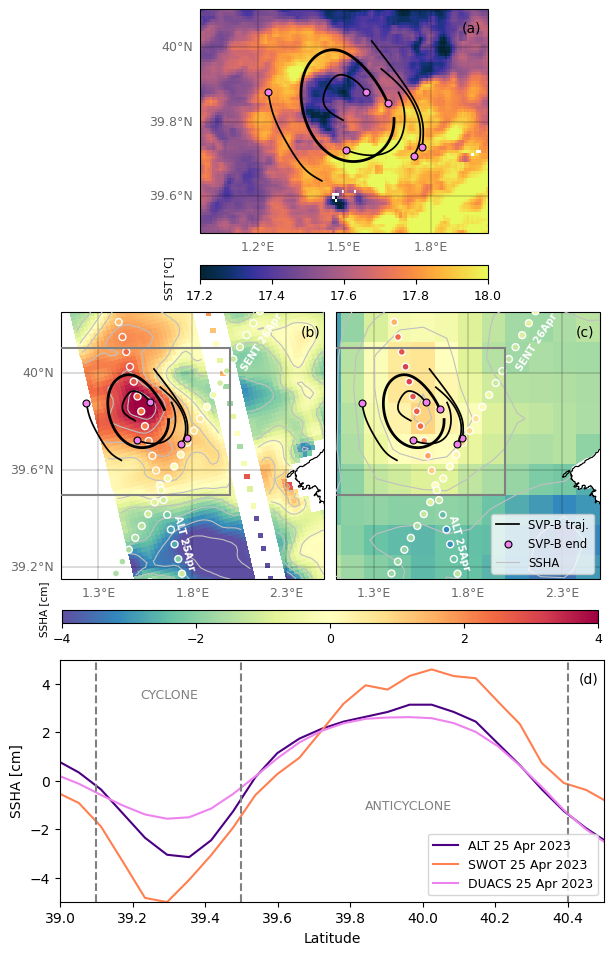

In [ ]:
# Define the figure and grid
fig = plt.figure(figsize=(8, 11))  # Increase figure height to maintain consistency
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1.4, 1], wspace=-0.2, hspace=0.18)  
fontsize = 9

# Set extent of the map
extent = [1.1, 2.5, 39.15, 40.25]

# ####### AX1 #######
ax1 = fig.add_axes([0.35, 0.65, 0.36, 0.36], projection=ccrs.Mercator())  # (left, bottom, width, height)

ax1.set_extent([1, 2, 39.5, 40.1])

coast = cf.GSHHSFeature(scale='full')
ax1.add_feature(coast, zorder=2001, linewidth=0.8)
ax1.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.2, 1.5, 1.8])
gl.ylocator = mticker.FixedLocator([39.6, 39.8, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot1 = ax1.pcolormesh(lon_SST, lat_SST, SST - 273.15, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=17.2, vmax=18, zorder=0)

# Drifters
dd1 = str(ds_SWOT26.time[10][40].values - np.timedelta64(3, 'D'))
dd2 = str(ds_SWOT26.time[10][40].values + np.timedelta64(3, 'D'))

# Plot trajectory segments
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax1.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500, label='SVP-B traj. 35')
ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

# Add horizontal colorbar for ax1
cbar1 = plt.colorbar(plot1, ax=ax1, orientation='horizontal', fraction=0.08, pad=0.08)
cbar1.ax.text(17.1, -1.25, 'SST [°C]', fontsize=fontsize-1.5, rotation=90)

cbar1.ax.tick_params(labelsize=fontsize)

# ####### AX2 #######
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Mercator())  # (second row, first column)
ax2.set_extent(extent)
ax2.add_feature(coast, zorder=2001, linewidth=0.8)
ax2.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot2 = ax2.pcolormesh(ds_SWOT26.longitude, ds_SWOT26.latitude, (ds_SWOT26.ssha_noiseless - np.nanmean(ssha_swot_interp))* 100,
                       transform=ccrs.PlateCarree(), vmin=-4, vmax=4, cmap='Spectral_r')

# PLOT ALTIKA
ax2.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax2.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')

CS = ax2.contour(ds_SWOT26.longitude, ds_SWOT26.latitude, ds_SWOT26.ssha_noiseless * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=6)

# Drifters
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax2.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)

# add text "ALT" and "SENT"
ax2.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax2.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# add box in the map to indicate the cyclone with the correct projection
from matplotlib.patches import Rectangle
ax2.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))


# ####### AX3 #######
ax3 = fig.add_subplot(gs[1, 1], projection=ccrs.Mercator())  # (second row, second column)
ax3.set_extent(extent)
ax3.add_feature(coast, zorder=2001, linewidth=0.8)
ax3.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot3 = ax3.pcolormesh(lon_DUACS, lat_DUACS, (ds_DUACS26.sla.squeeze()- np.nanmean(ssha_duacs_interp)) * 100,
                       transform=ccrs.PlateCarree(), vmin=-4, vmax=4, cmap='Spectral_r')

# DUACS contours
CS3 = ax3.contour(lon_DUACS, lat_DUACS, ds_DUACS26.sla.squeeze() * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=5, label= 'SSHA')

# Add proxy artist for the legend
from matplotlib.lines import Line2D
contour_legend = Line2D([0], [0], color='silver', linewidth=0.8, label='SSHA')

# PLOT ALTIKA
ax3.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4, vmax=4, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax3.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4, vmax=4, cmap='Spectral_r', zorder=500, edgecolors='white')

# add text "ALT" and "SENT"
ax3.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax3.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

ax3.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))

# Drifters for ax3
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax3.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())


# Create custom legend entries
handles, labels = ax3.get_legend_handles_labels()

# Append SSHA proxy entry
handles.append(contour_legend)
labels.append('SSHA')

# Legend for ax2
ax3.legend(handles=handles, labels=labels, loc='lower right', fontsize=fontsize - 0.7, facecolor='white')


# ####### AX4 #######
# ax4 = fig.add_subplot(gs[2, :])  # (third row, spans all columns)
ax4 = fig.add_axes([0.175, 0.1, 0.68, 0.22])  # (left, bottom, width, height)

plt.plot(lat_ALT, (sla_filtered_ALT - np.nanmean(sla_filtered_ALT)) * 100, '-', c='indigo', label='ALT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_swot_interp - np.nanmean(ssha_swot_interp)) * 100, '-', c='coral', label='SWOT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_duacs_interp - np.nanmean(ssha_duacs_interp)) * 100, '-', c='violet', label='DUACS 25 Apr 2023')

plt.xlim([39, 40.5])
plt.xlabel('Latitude')
plt.ylabel('SSHA [cm]')

plt.axvline(x=39.1, color='gray', linestyle='--')
plt.axvline(x=39.5, color='gray', linestyle='--')
plt.axvline(x=40.4, color='gray', linestyle='--')

plt.text(39.22, 3.4, 'CYCLONE', c='gray', fontsize=fontsize)
plt.text(39.84, -1.2, 'ANTICYCLONE', c='gray', fontsize=fontsize)

plt.legend(loc='lower right', fontsize=fontsize)
plt.ylim([-5, 5])

ax1.text(0.91, 0.95, '(a)', transform=ax1.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax2.text(0.91, 0.95, '(b)', transform=ax2.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax3.text(0.91, 0.95, '(c)', transform=ax3.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax4.text(0.99, 0.95, '(d)', transform=ax4.transAxes, fontsize=fontsize + 1, va='top', ha='right', zorder=1000)

cbar = plt.colorbar(plot2, ax=[ax2, ax3], orientation='horizontal', fraction=0.04, pad=0.1, aspect=43)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([-4, -2, 0, 2, 4])
cbar.ax.text(-4.35, -0.93, 'SSHA [cm]', fontsize=fontsize-1.5, rotation=90)

# plt.tight_layout()
# plt.savefig('C:/Users/ASUS/OneDrive - Universitat de les Illes Balears/grl_codes_to_publish_def_swotv1.0/figures_def/figure2.png', dpi=300, bbox_inches='tight')
plt.show()